<a href="https://colab.research.google.com/github/Maryam-Zubair/Data-Science/blob/main/DecisionTreesSt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
plt.rcParams["savefig.bbox"] = "tight"

np.set_printoptions(precision=3)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

### Step 1: Load the Cancer dataset
- Use `from sklearn.datasets import load_breast_cancer`
- Split data into train and test sets, utilize `data` and `target` from the downloaded cancer dataset

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()

In [ ]:
X,y = cancer.data , cancer.target

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(X,y,random_state=42,stratify=y)

### Step 2: Fitting the Tree Model
- Create a tree model with `max_depth=2`. Use `from sklearn.tree import DecisionTreeClassifier`
- Plot the tree with feature names. Use `from sklearn.tree import plot_tree`

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
cols = cancer.feature_names

In [ ]:
dt1 = DecisionTreeClassifier(max_depth=2, random_state=0)

In [ ]:
dt1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

[Text(0.5, 0.8333333333333334, 'worst radius <= 16.795\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.25, 0.5, 'worst concave points <= 0.136\ngini = 0.161\nsamples = 284\nvalue = [25, 259]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.031\nsamples = 252\nvalue = [4, 248]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.451\nsamples = 32\nvalue = [21, 11]'),
 Text(0.75, 0.5, 'texture error <= 0.473\ngini = 0.106\nsamples = 142\nvalue = [134, 8]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.043\nsamples = 137\nvalue = [134, 3]')]

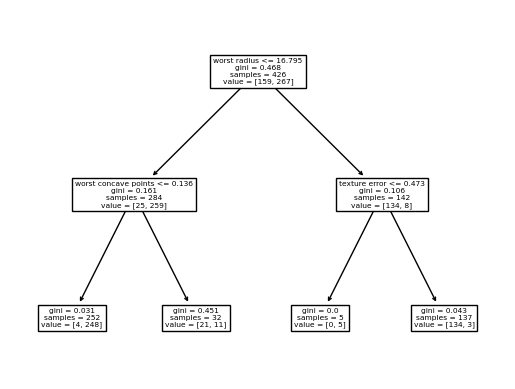

In [ ]:
plot_tree(dt1, feature_names=cols)

### Step 3: Parameter Tuning
- Create a grtid search for `max_depth`. Use integer values from 1 to 6.
- Plot the mean train and test scores versus the maximum depth


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'max_depth': np.arange(1,7)}

In [ ]:
mygrid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = params, return_train_score=True)

In [ ]:
mygrid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6])},
             return_train_score=True)

In [ ]:
mygrid.cv_results_

{'mean_fit_time': array([0.007, 0.005, 0.004, 0.005, 0.013, 0.012]),
 'std_fit_time': array([0.004, 0.003, 0.001, 0.001, 0.005, 0.001]),
 'mean_score_time': array([0.002, 0.005, 0.001, 0.001, 0.001, 0.001]),
 'std_score_time': array([0.003, 0.005, 0.   , 0.   , 0.   , 0.001]),
 'param_max_depth': masked_array(data=[1, 2, 3, 4, 5, 6],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1},
  {'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6}],
 'split0_test_score': array([0.86 , 0.872, 0.907, 0.907, 0.93 , 0.919]),
 'split1_test_score': array([0.929, 0.941, 0.965, 0.929, 0.918, 0.918]),
 'split2_test_score': array([0.871, 0.918, 0.918, 0.918, 0.929, 0.918]),
 'split3_test_score': array([0.894, 0.918, 0.918, 0.918, 0.929, 0.906]),
 'split4_test_score': array([0.918, 0.988, 0.965, 0.941, 0.918, 0.918]),
 'mean_test_score': array([0.894, 0.927, 0.934, 0.923

In [ ]:
# returning into data frame
res = pd.DataFrame(mygrid.cv_results_)

In [ ]:
res.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

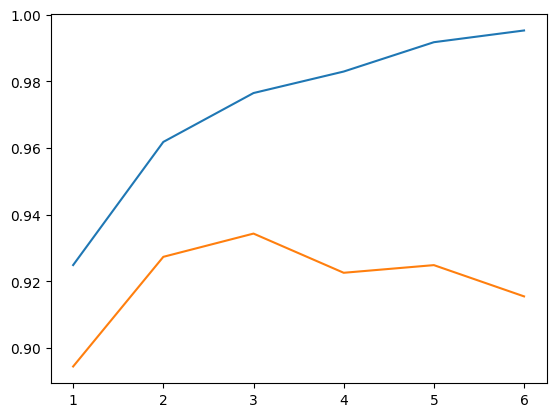

In [ ]:
plt.plot(res.param_max_depth,res.mean_train_score)
plt.plot(res.param_max_depth,res.mean_test_score)
# we can see the graph and tell what is the best depth for the data : which is 3 in this case

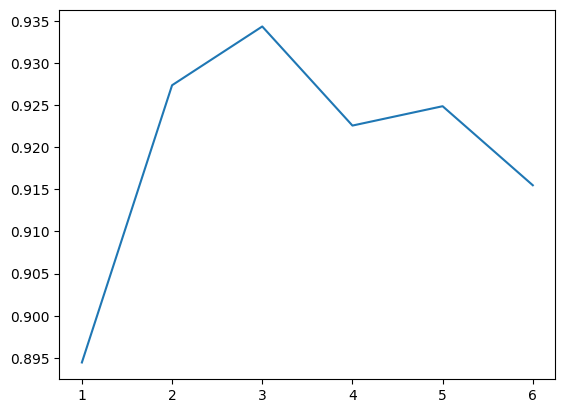

In [ ]:
plt.plot(res.param_max_depth,res.mean_test_score)

In [ ]:
ram_prices = pd.read_csv('ram_price.csv', index_col=0)

In [ ]:
ram_prices.head()

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0
3,1965.0,2642412.0
4,1970.0,734003.0


In [ ]:
ram_prices.shape

(333, 2)

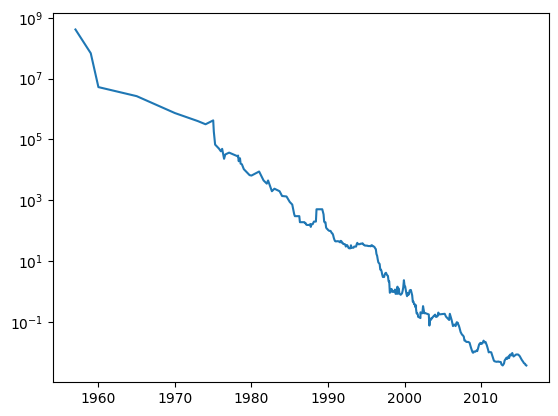

In [ ]:
# log on y axis
plt.semilogy(ram_prices.date, ram_prices.price)

In [ ]:
# splitting into train test dataset
data_train =ram_prices[ram_prices.date<2000]
data_test =ram_prices[ram_prices.date>=2000]

In [ ]:
# using traing and spliting x,y train
X_train = data_train.date
y_train = data_train.price

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train = X_train[:,np.newaxis]

<ipython-input-53-6f6a80f0f1ee>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train[:,np.newaxis]


In [ ]:
X_train.shape

(112, 4)

In [ ]:
# target variable transformation
y_train = np.log(y_train)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
dtr = DecisionTreeRegressor(max_depth=4)
lr = LinearRegression()

In [ ]:
dtr.fit(X_train, y_train)
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_train_hat_d = dtr.predict(X_train)
y_train_hat_1 = lr.predict(X_train)

In [ ]:
X_test = data_test.date
y_test = data_test.price
X_test = X_test[:,np.newaxis]
y_test_hat_d = dtr.predict(X_test)
y_test_hat_1 = lr.predict(X_test)

<ipython-input-74-74041a791568>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = X_test[:,np.newaxis]


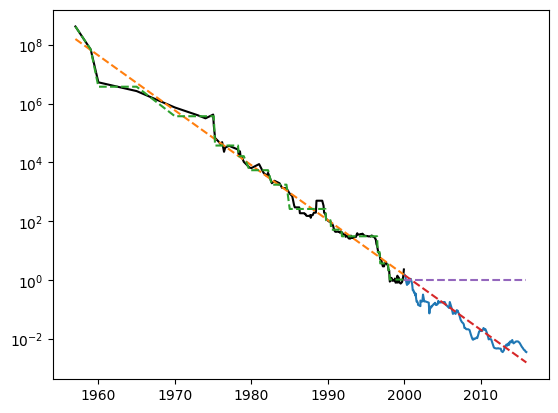

In [ ]:
plt.semilogy(data_train.date, data_train.price, c='k')
plt.semilogy(data_test.date, data_test.price)
plt.semilogy(data_train.date, np.exp(y_train_hat_1),'--')
plt.semilogy(data_train.date, np.exp(y_train_hat_d), '--')
plt.semilogy(data_test.date, np.exp(y_test_hat_1), '--')
plt.semilogy(data_test.date, np.exp(y_test_hat_d), '--')

In [ ]:
plt.semilogy(data_train.date, data_train.price)

### Step 4: Parameter Tuning
- Create a grtid search for `max_leaf_nodes`. Use integer values from 2 to 19.
- Plot the mean train and test scores versus the maximum depth


### Step 5: Extrapolation
- Read the dataset `ram_prices.csv`
- Plot the price versus year. Use logarithmic scale for the price.
- Create train and test datasets by splitting the data as train data being data before year 2000 and test data being data after year 2000
- Use price as the target variable. Take logarithm of the price.
- Train a tree and linear regression model
- Plot the train and test datasets as well as the predictions for the train dataset
- Plot the train and test datasets as well as the predictions for the the entire dataset


### Step 6: Feature Importance
- Load Iris dataset using `from sklearn.datasets import load_iris`
- Train a DT with `max_leaf_nodes=6`
- Plot the decision tree
- Print the feature importance using `tree.feature_importances_`
- Create a bar graph for feature importance

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X,y = iris.data, iris.target

In [ ]:
col = iris.feature_names

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(X,y,random_state=42,stratify=y)

In [ ]:
dt2 = DecisionTreeClassifier(max_depth=4, random_state=0)

In [ ]:
dt2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

[Text(0.4, 0.9, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 112\nvalue = [38, 37, 37]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.5, 0.7, 'petal length (cm) <= 4.85\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.2, 0.5, 'petal width (cm) <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.3, 0.3, 'sepal length (cm) <= 6.05\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.8, 0.5, 'petal width (cm) <= 1.7\ngini = 0.142\nsamples = 39\nvalue = [0, 3, 36]'),
 Text(0.7, 0.3, 'petal length (cm) <= 4.95\ngini = 0.5\nsamples = 6\nvalue = [0, 3, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.8, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')

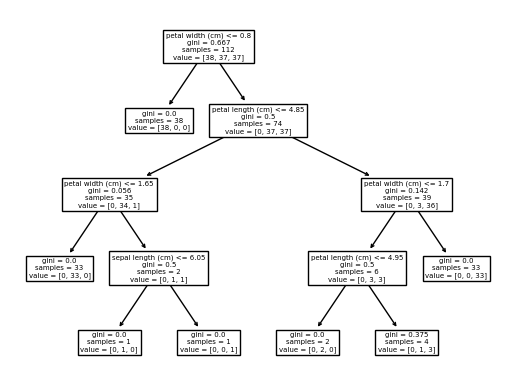

In [ ]:
plot_tree(dt2 , feature_names =col)

In [ ]:
# IMP ATTRIBUTE : FEATURE IMPORTANCE
dt2.feature_importances_

array([0.014, 0.   , 0.424, 0.562])

In [ ]:
col

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

([<matplotlib.axis.YTick at 0x79f8f748cac0>,
 [Text(0, 0, 'sepal length (cm)'),
  Text(0, 1, 'sepal width (cm)'),
  Text(0, 2, 'petal length (cm)'),
  Text(0, 3, 'petal width (cm)')])

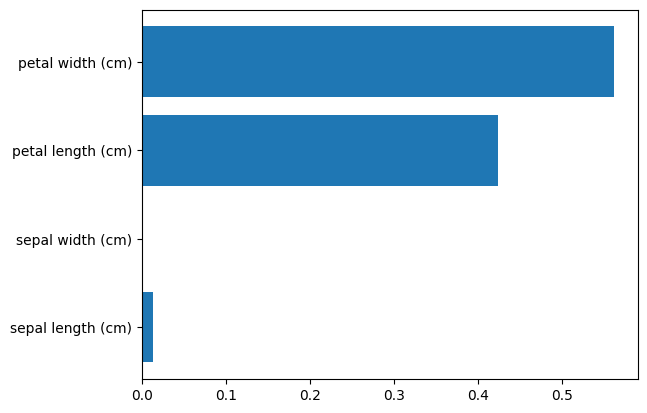

In [ ]:
plt.barh(range(4),dt2.feature_importances_)
plt.yticks(range(4), col)